In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce


In [27]:
df_baseline=pd.read_csv('baseline.csv',sep='\s+')
df_baseline

,Sec_Structure,Longest_Duration
0,3-helix,0.0
1,5-helix,0.0
2,A-helix,0.0
3,B-Bridge,0.0
4,B-Sheet,0.0
5,Bend,0.0
6,Coil,0.0
7,Turn,0.0


Note to self - WHEN USING THIS CODE, ALWAYS REMEMBER TO COMPARE THE LEN OF THE TWO DATAFRAMES (MEMBRANE INTERACTION AND SECONDARY STRUCTURE),
TO ENSURE YOU ARE ATTRIBUTING THE SS IN SS.DAT TO THE RIGHT RESIDUE

In [28]:
# len(df_astera),len(df_astera_ss),len(df_asterc),len(df_asterc_ss),len(df_cptp), len(df_cptp_ss),len(df_gm2a), len(df_gm2a_ss), len(df_lcn1), len(df_lcn1_ss),len(df_fabp), len(df_fabp_ss),len(df_ttpa), len(df_ttpa_ss), len(df_osh4), len(df_osh4_ss), len(df_osh6), len(df_osh6_ss), len(df_pitpa), len(df_pitpa_ss),len(df_sfh1), len(df_sfh1_ss), len(df_smp), len(df_smp_ss)

In [29]:
df_astera=pd.read_csv('../astera/astera_100dopc_prolint.csv', sep='\t')


df_astera_ss=pd.read_csv('../../../../aa_prot_in_water/astera/apo/ss.dat',header=None, skiprows=[0,1,2])
df_astera_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_astera_ss_replace=df_astera_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_astera_merged=pd.merge(df_astera, df_astera_ss_replace, left_index=True, right_index=True)
df_astera_ordered=df_astera_merged[df_astera_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_astera_ordered_select=df_astera_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_astera_grouped=df_astera_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_astera_grouped.to_csv('astera.csv',sep='\t')
df_astera_f=pd.read_csv('astera.csv',sep='\t')


df_astera_all = df_baseline.merge(df_astera_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_astera'))
df_astera_all=df_astera_all.replace(np.nan, 0)
df_astera_all=df_astera_all[['Sec_Structure','Longest_Duration_astera']]

cols_to_norm = ['Longest_Duration_astera']
df_astera_all['Longest_Duration_astera'] = df_astera_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_astera_all

,Sec_Structure,Longest_Duration_astera
0,3-helix,0.000000
1,5-helix,0.000000
2,A-helix,1.000000
3,B-Bridge,0.000000
4,B-Sheet,0.190193
5,Bend,0.466568
6,Coil,0.454681
7,Turn,0.260030


In [30]:
df_astera_grouped

Sec_Structure
A-helix    0.3365
B-Sheet    0.0640
Bend       0.1570
Coil       0.1530
Turn       0.0875
Name: Longest_Duration, dtype: float64

In [31]:
df_asterc=pd.read_csv('../asterc/asterc_100dopc_prolint.csv', sep='\t')


df_asterc_ss=pd.read_csv('../../../../aa_prot_in_water/asterc/ss.dat',header=None, skiprows=[0,1,2])
df_asterc_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_asterc_ss_replace=df_asterc_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_asterc_merged=pd.merge(df_asterc, df_asterc_ss_replace, left_index=True, right_index=True)
df_asterc_ordered=df_asterc_merged[df_asterc_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_asterc_ordered_select=df_asterc_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_asterc_grouped=df_asterc_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_asterc_grouped.to_csv('asterc.csv',sep='\t')
df_asterc_f=pd.read_csv('asterc.csv',sep='\t')


df_asterc_all = df_baseline.merge(df_asterc_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_asterc'))
df_asterc_all=df_asterc_all.replace(np.nan, 0)
df_asterc_all=df_asterc_all[['Sec_Structure','Longest_Duration_asterc']]

cols_to_norm = ['Longest_Duration_asterc']
df_asterc_all['Longest_Duration_asterc'] = df_asterc_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_asterc_all

,Sec_Structure,Longest_Duration_asterc
0,3-helix,0.000000
1,5-helix,0.000000
2,A-helix,1.000000
3,B-Bridge,0.003912
4,B-Sheet,0.571205
5,Bend,0.297340
6,Coil,0.336463
7,Turn,0.751956


In [32]:
df_cptp=pd.read_csv('../cptp/cptp_100dopc_prolint.dat', sep='\t')


df_cptp_ss=pd.read_csv('../../../../aa_prot_in_water/cptp/4kbs/new_500ns/apo/ss.dat',header=None, skiprows=[0,1,2])
df_cptp_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_cptp_ss_replace=df_cptp_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_cptp_merged=pd.merge(df_cptp, df_cptp_ss_replace, left_index=True, right_index=True)
df_cptp_ordered=df_cptp_merged[df_cptp_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_cptp_ordered_select=df_cptp_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_cptp_grouped=df_cptp_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_cptp_grouped.to_csv('cptp.csv',sep='\t')
df_cptp_f=pd.read_csv('cptp.csv',sep='\t')


df_cptp_all = df_baseline.merge(df_cptp_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_cptp'))
df_cptp_all=df_cptp_all.replace(np.nan, 0)
df_cptp_all=df_cptp_all[['Sec_Structure','Longest_Duration_cptp']]

cols_to_norm = ['Longest_Duration_cptp']
df_cptp_all['Longest_Duration_cptp'] = df_cptp_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_cptp_all

,Sec_Structure,Longest_Duration_cptp
0,3-helix,0.130896
1,5-helix,0.000000
2,A-helix,1.000000
3,B-Bridge,0.000000
4,B-Sheet,0.000000
5,Bend,0.326651
6,Coil,0.164505
7,Turn,0.095519


In [33]:
df_gm2a=pd.read_csv('../gm2a/gm2a_100dopc_prolint.csv', sep='\t')


df_gm2a_ss=pd.read_csv('../../../../aa_prot_in_water/gm2a/apo/ss.dat',header=None, skiprows=[0,1,2])
df_gm2a_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_gm2a_ss_replace=df_gm2a_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_gm2a_merged=pd.merge(df_gm2a, df_gm2a_ss_replace, left_index=True, right_index=True)
df_gm2a_ordered=df_gm2a_merged[df_gm2a_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_gm2a_ordered_select=df_gm2a_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_gm2a_grouped=df_gm2a_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_gm2a_grouped.to_csv('gm2a.csv',sep='\t')
df_gm2a_f=pd.read_csv('gm2a.csv',sep='\t')


df_gm2a_all = df_baseline.merge(df_gm2a_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_gm2a'))
df_gm2a_all=df_gm2a_all.replace(np.nan, 0)
df_gm2a_all=df_gm2a_all[['Sec_Structure','Longest_Duration_gm2a']]

cols_to_norm = ['Longest_Duration_gm2a']
df_gm2a_all['Longest_Duration_gm2a'] = df_gm2a_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_gm2a_all

,Sec_Structure,Longest_Duration_gm2a
0,3-helix,0.000000
1,5-helix,0.000000
2,A-helix,0.238512
3,B-Bridge,0.380569
4,B-Sheet,1.000000
5,Bend,0.136459
6,Coil,0.968393
7,Turn,0.372988


In [34]:
df_osh6=pd.read_csv('../osh6/osh6_100dopc_prolint.csv', sep='\t',skiprows=[1])
#skipping the first row since simulated MET -1 in the CG model but not in the atomistic

df_osh6_ss=pd.read_csv('../../../../aa_prot_in_water/osh6/new_500ns/apo/ss.dat',header=None, skiprows=[0,1,2])
df_osh6_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_osh6_ss_replace=df_osh6_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_osh6_merged=pd.merge(df_osh6, df_osh6_ss_replace, left_index=True, right_index=True)
df_osh6_ordered=df_osh6_merged[df_osh6_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_osh6_ordered_select=df_osh6_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_osh6_grouped=df_osh6_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_osh6_grouped.to_csv('osh6.csv',sep='\t')
df_osh6_f=pd.read_csv('osh6.csv',sep='\t')


df_osh6_all = df_baseline.merge(df_osh6_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_osh6'))
df_osh6_all=df_osh6_all.replace(np.nan, 0)
df_osh6_all=df_osh6_all[['Sec_Structure','Longest_Duration_osh6']]

cols_to_norm = ['Longest_Duration_osh6']
df_osh6_all['Longest_Duration_osh6'] = df_osh6_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_osh6_all

,Sec_Structure,Longest_Duration_osh6
0,3-helix,0.008111
1,5-helix,0.000000
2,A-helix,0.346466
3,B-Bridge,0.002317
4,B-Sheet,0.519119
5,Bend,1.000000
6,Coil,0.931634
7,Turn,0.227115


In [35]:
df_osh6=pd.read_csv('../osh6/osh6_100dopc_prolint.csv', sep='\t',skiprows=[1])
#skipping the first row since simulated MET -1 in the CG model but not in the atomistic

df_osh6_ss=pd.read_csv('../../../../aa_prot_in_water/osh6/new_500ns/apo/ss.dat',header=None, skiprows=[0,1,2])
df_osh6_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_osh6_ss_replace=df_osh6_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_osh6_merged=pd.merge(df_osh6, df_osh6_ss_replace, left_index=True, right_index=True)
df_osh6_ordered=df_osh6_merged[df_osh6_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_osh6_ordered_select=df_osh6_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_osh6_grouped=df_osh6_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_osh6_grouped.to_csv('osh6.csv',sep='\t')
df_osh6_f=pd.read_csv('osh6.csv',sep='\t')


df_osh6_all = df_baseline.merge(df_osh6_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_osh6'))
df_osh6_all=df_osh6_all.replace(np.nan, 0)
df_osh6_all=df_osh6_all[['Sec_Structure','Longest_Duration_osh6']]

cols_to_norm = ['Longest_Duration_osh6']
df_osh6_all['Longest_Duration_osh6'] = df_osh6_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_osh6_all

,Sec_Structure,Longest_Duration_osh6
0,3-helix,0.008111
1,5-helix,0.000000
2,A-helix,0.346466
3,B-Bridge,0.002317
4,B-Sheet,0.519119
5,Bend,1.000000
6,Coil,0.931634
7,Turn,0.227115


In [36]:
df_osh4=pd.read_csv('../osh4/osh4_100dopc_prolint.csv', sep='\t',skiprows=[1,2])
#skipping the first two since the atomistic model is MET SER GLN TYR, while the CG model Prolint data (Prolint 
#excludes resid -1 automatically) is MET ASP PRO SER GLN TYR. Since these are N-term residues 1 residue wont matter to
#the secondary structure so i will just ignore the first two lines of the cg csv ie. MET and ASP. So MET SER GLN TYR in
#AA and PRO SER GLN TYR in CG

df_osh4_ss=pd.read_csv('../../../../aa_prot_in_water/osh4/apos/apofromerg_1zhz/ss.dat',header=None, skiprows=[0,1,2])
df_osh4_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_osh4_ss_replace=df_osh4_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_osh4_merged=pd.merge(df_osh4, df_osh4_ss_replace, left_index=True, right_index=True)
df_osh4_ordered=df_osh4_merged[df_osh4_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_osh4_ordered_select=df_osh4_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_osh4_grouped=df_osh4_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_osh4_grouped.to_csv('osh4.csv',sep='\t')
df_osh4_f=pd.read_csv('osh4.csv',sep='\t')


df_osh4_all = df_baseline.merge(df_osh4_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_osh4'))
df_osh4_all=df_osh4_all.replace(np.nan, 0)
df_osh4_all=df_osh4_all[['Sec_Structure','Longest_Duration_osh4']]

cols_to_norm = ['Longest_Duration_osh4']
df_osh4_all['Longest_Duration_osh4'] = df_osh4_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_osh4_all

,Sec_Structure,Longest_Duration_osh4
0,3-helix,0.088670
1,5-helix,0.000000
2,A-helix,1.000000
3,B-Bridge,0.009852
4,B-Sheet,0.039409
5,Bend,0.458128
6,Coil,0.428571
7,Turn,0.733990


In [37]:
df_lcn1=pd.read_csv('../lcn1/lcn1_100dopc_prolint.csv', sep='\t')


df_lcn1_ss=pd.read_csv('../../../../aa_prot_in_water/lcn1/apo/ss.dat',header=None, skiprows=[0,1,2])
df_lcn1_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_lcn1_ss_replace=df_lcn1_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_lcn1_merged=pd.merge(df_lcn1, df_lcn1_ss_replace, left_index=True, right_index=True)
df_lcn1_ordered=df_lcn1_merged[df_lcn1_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_lcn1_ordered_select=df_lcn1_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_lcn1_grouped=df_lcn1_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_lcn1_grouped.to_csv('lcn1.csv',sep='\t')
df_lcn1_f=pd.read_csv('lcn1.csv',sep='\t')


df_lcn1_all = df_baseline.merge(df_lcn1_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_lcn1'))
df_lcn1_all=df_lcn1_all.replace(np.nan, 0)
df_lcn1_all=df_lcn1_all[['Sec_Structure','Longest_Duration_lcn1']]

cols_to_norm = ['Longest_Duration_lcn1']
df_lcn1_all['Longest_Duration_lcn1'] = df_lcn1_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_lcn1_all

,Sec_Structure,Longest_Duration_lcn1
0,3-helix,0.000000
1,5-helix,0.000000
2,A-helix,0.204545
3,B-Bridge,0.000000
4,B-Sheet,0.625000
5,Bend,1.000000
6,Coil,0.528409
7,Turn,0.642045


In [38]:
df_fabp=pd.read_csv('../fabp/fabp_100dopc_prolint.csv', sep='\t')


df_fabp_ss=pd.read_csv('../../../../aa_prot_in_water/fabp_5ce4/apo/ss.dat',header=None, skiprows=[0,1,2])
df_fabp_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_fabp_ss_replace=df_fabp_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_fabp_merged=pd.merge(df_fabp, df_fabp_ss_replace, left_index=True, right_index=True)
df_fabp_ordered=df_fabp_merged[df_fabp_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_fabp_ordered_select=df_fabp_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_fabp_grouped=df_fabp_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_fabp_grouped.to_csv('fabp.csv',sep='\t')
df_fabp_f=pd.read_csv('fabp.csv',sep='\t')


df_fabp_all = df_baseline.merge(df_fabp_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_fabp'))
df_fabp_all=df_fabp_all.replace(np.nan, 0)
df_fabp_all=df_fabp_all[['Sec_Structure','Longest_Duration_fabp']]

cols_to_norm = ['Longest_Duration_fabp']
df_fabp_all['Longest_Duration_fabp'] = df_fabp_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_fabp_all

,Sec_Structure,Longest_Duration_fabp
0,3-helix,0.005034
1,5-helix,0.000000
2,A-helix,1.000000
3,B-Bridge,0.000000
4,B-Sheet,0.422819
5,Bend,0.260067
6,Coil,0.664430
7,Turn,0.402685


In [39]:
df_ttpa=pd.read_csv('../ttpa/ttpa_100dopc_prolint.csv', sep='\t')


df_ttpa_ss=pd.read_csv('../../../../aa_prot_in_water/ttpa_1oip/old_25to275_usethis/apo/ss.dat',header=None, skiprows=[0,1,2])
df_ttpa_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_ttpa_ss_replace=df_ttpa_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_ttpa_merged=pd.merge(df_ttpa, df_ttpa_ss_replace, left_index=True, right_index=True)
df_ttpa_ordered=df_ttpa_merged[df_ttpa_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_ttpa_ordered_select=df_ttpa_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_ttpa_grouped=df_ttpa_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_ttpa_grouped.to_csv('ttpa.csv',sep='\t')
df_ttpa_f=pd.read_csv('ttpa.csv',sep='\t')


df_ttpa_all = df_baseline.merge(df_ttpa_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_ttpa'))
df_ttpa_all=df_ttpa_all.replace(np.nan, 0)
df_ttpa_all=df_ttpa_all[['Sec_Structure','Longest_Duration_ttpa']]

cols_to_norm = ['Longest_Duration_ttpa']
df_ttpa_all['Longest_Duration_ttpa'] = df_ttpa_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_ttpa_all

,Sec_Structure,Longest_Duration_ttpa
0,3-helix,0.204986
1,5-helix,0.000000
2,A-helix,1.000000
3,B-Bridge,0.000000
4,B-Sheet,0.016117
5,Bend,0.048351
6,Coil,0.429867
7,Turn,0.260388


In [40]:
df_sfh1=pd.read_csv('../sfh1_3b74/sfh1_100dopc_prolint.csv', sep='\t')


df_sfh1_ss=pd.read_csv('../../../../aa_prot_in_water/sfh1/new_101to274/apo/ss.dat',header=None, skiprows=[0,1,2])
df_sfh1_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_sfh1_ss_replace=df_sfh1_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_sfh1_merged=pd.merge(df_sfh1, df_sfh1_ss_replace, left_index=True, right_index=True)
df_sfh1_ordered=df_sfh1_merged[df_sfh1_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_sfh1_ordered_select=df_sfh1_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_sfh1_grouped=df_sfh1_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_sfh1_grouped.to_csv('sfh1.csv',sep='\t')
df_sfh1_f=pd.read_csv('sfh1.csv',sep='\t')


df_sfh1_all = df_baseline.merge(df_sfh1_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_sfh1'))
df_sfh1_all=df_sfh1_all.replace(np.nan, 0)
df_sfh1_all=df_sfh1_all[['Sec_Structure','Longest_Duration_sfh1']]

cols_to_norm = ['Longest_Duration_sfh1']
df_sfh1_all['Longest_Duration_sfh1'] = df_sfh1_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_sfh1_all

,Sec_Structure,Longest_Duration_sfh1
0,3-helix,0.078611
1,5-helix,0.000000
2,A-helix,1.000000
3,B-Bridge,0.032907
4,B-Sheet,0.109689
5,Bend,0.115174
6,Coil,0.497258
7,Turn,0.438757


In [41]:
df_pitpa=pd.read_csv('../pitpa/pitpa_100dopc_prolint.xvg', sep='\t')


df_pitpa_ss=pd.read_csv('../../../../aa_prot_in_water/pitpa/new_500ns/apo/ss.dat',header=None, skiprows=[0,1,2])
df_pitpa_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_pitpa_ss_replace=df_pitpa_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_pitpa_merged=pd.merge(df_pitpa, df_pitpa_ss_replace, left_index=True, right_index=True)
df_pitpa_ordered=df_pitpa_merged[df_pitpa_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_pitpa_ordered_select=df_pitpa_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_pitpa_grouped=df_pitpa_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_pitpa_grouped.to_csv('pitpa.csv',sep='\t')
df_pitpa_f=pd.read_csv('pitpa.csv',sep='\t')


df_pitpa_all = df_baseline.merge(df_pitpa_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_pitpa'))
df_pitpa_all=df_pitpa_all.replace(np.nan, 0)
df_pitpa_all=df_pitpa_all[['Sec_Structure','Longest_Duration_pitpa']]

cols_to_norm = ['Longest_Duration_pitpa']
df_pitpa_all['Longest_Duration_pitpa'] = df_pitpa_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_pitpa_all

,Sec_Structure,Longest_Duration_pitpa
0,3-helix,0.115413
1,5-helix,0.000000
2,A-helix,1.000000
3,B-Bridge,0.007305
4,B-Sheet,0.054785
5,Bend,0.094960
6,Coil,0.398101
7,Turn,0.889701


In [42]:
df_smp=pd.read_csv('../smp/smp_100dopc_prolint.csv', sep='\t')

#THERE IS AN "=" SYMBOL IN THE SS.DAT, BECAUSE OF THE HUGE DISTANCE BETWEEN THE LAST RESIDUE OF CHAIN A
#AND THE FIRST RESIDUE OF CHAIN B. HENCE FOR OUR PURPOSES YOU CAN DELETE THIS = IN THE SS.DAT AND MOVE ON. 

df_smp_ss=pd.read_csv('../../../../../Esyt2_SMPdomain/smp_0_1_2_DOG_per_chain/new_500ns/smp_0_0_dog/ss.dat',header=None, skiprows=[0,1,2])
df_smp_ss.rename(columns = {0:'Sec_Structure'}, inplace = True)
df_smp_ss_replace=df_smp_ss.replace({'~':'Coil', "E": "B-Sheet" , "B": "B-Bridge" , "S": "Bend" , 
                                           "T": "Turn" , "H": "A-helix" , "I": "5-helix" , "G": "3-helix"}, 
                                          regex=True)


df_smp_merged=pd.merge(df_smp, df_smp_ss_replace, left_index=True, right_index=True)
df_smp_ordered=df_smp_merged[df_smp_merged.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_smp_ordered_select=df_smp_ordered[['ResName', 'ResID', 'Longest_Duration',"Sec_Structure"]]

df_smp_grouped=df_smp_ordered_select.groupby('Sec_Structure')['Longest_Duration'].sum()
df_smp_grouped.to_csv('smp.csv',sep='\t')
df_smp_f=pd.read_csv('smp.csv',sep='\t')


df_smp_all = df_baseline.merge(df_smp_f.drop_duplicates(), on=['Sec_Structure'], 
                   how='left', indicator=True, suffixes=('_base', '_smp'))
df_smp_all=df_smp_all.replace(np.nan, 0)
df_smp_all=df_smp_all[['Sec_Structure','Longest_Duration_smp']]

cols_to_norm = ['Longest_Duration_smp']
df_smp_all['Longest_Duration_smp'] = df_smp_all[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_smp_all

,Sec_Structure,Longest_Duration_smp
0,3-helix,0.533333
1,5-helix,0.000000
2,A-helix,0.910145
3,B-Bridge,0.000000
4,B-Sheet,0.881159
5,Bend,0.179710
6,Coil,0.217391
7,Turn,1.000000


In [56]:
data_frames = [df_cptp_all, df_smp_all, df_fabp_all, df_astera_all, df_asterc_all, df_gm2a_all,df_lcn1_all,df_osh4_all, df_osh6_all,df_pitpa_all,df_sfh1_all,df_ttpa_all]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Sec_Structure'],
                                            how='outer'), data_frames)

In [44]:
df_merged

,Sec_Structure,Longest_Duration_cptp,Longest_Duration_smp,Longest_Duration_fabp,Longest_Duration_astera,Longest_Duration_asterc,Longest_Duration_gm2a,Longest_Duration_lcn1,Longest_Duration_osh4,Longest_Duration_osh6,Longest_Duration_pitpa,Longest_Duration_sfh1,Longest_Duration_ttpa
0,3-helix,0.130896,0.533333,0.005034,0.000000,0.000000,0.000000,0.000000,0.088670,0.008111,0.115413,0.078611,0.204986
1,5-helix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A-helix,1.000000,0.910145,1.000000,1.000000,1.000000,0.238512,0.204545,1.000000,0.346466,1.000000,1.000000,1.000000
3,B-Bridge,0.000000,0.000000,0.000000,0.000000,0.003912,0.380569,0.000000,0.009852,0.002317,0.007305,0.032907,0.000000
4,B-Sheet,0.000000,0.881159,0.422819,0.190193,0.571205,1.000000,0.625000,0.039409,0.519119,0.054785,0.109689,0.016117
5,Bend,0.326651,0.179710,0.260067,0.466568,0.297340,0.136459,1.000000,0.458128,1.000000,0.094960,0.115174,0.048351
6,Coil,0.164505,0.217391,0.664430,0.454681,0.336463,0.968393,0.528409,0.428571,0.931634,0.398101,0.497258,0.429867
7,Turn,0.095519,1.000000,0.402685,0.260030,0.751956,0.372988,0.642045,0.733990,0.227115,0.889701,0.438757,0.260388


In [57]:
df_merged.loc[8] = df_merged[0:3].sum(numeric_only=True,axis=0)
df_merged['Sec_Structure'] = df_merged['Sec_Structure'].fillna('Helices')
df_merged


,Sec_Structure,Longest_Duration_cptp,Longest_Duration_smp,Longest_Duration_fabp,Longest_Duration_astera,Longest_Duration_asterc,Longest_Duration_gm2a,Longest_Duration_lcn1,Longest_Duration_osh4,Longest_Duration_osh6,Longest_Duration_pitpa,Longest_Duration_sfh1,Longest_Duration_ttpa
0,3-helix,0.130896,0.533333,0.005034,0.000000,0.000000,0.000000,0.000000,0.088670,0.008111,0.115413,0.078611,0.204986
1,5-helix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A-helix,1.000000,0.910145,1.000000,1.000000,1.000000,0.238512,0.204545,1.000000,0.346466,1.000000,1.000000,1.000000
3,B-Bridge,0.000000,0.000000,0.000000,0.000000,0.003912,0.380569,0.000000,0.009852,0.002317,0.007305,0.032907,0.000000
4,B-Sheet,0.000000,0.881159,0.422819,0.190193,0.571205,1.000000,0.625000,0.039409,0.519119,0.054785,0.109689,0.016117
5,Bend,0.326651,0.179710,0.260067,0.466568,0.297340,0.136459,1.000000,0.458128,1.000000,0.094960,0.115174,0.048351
6,Coil,0.164505,0.217391,0.664430,0.454681,0.336463,0.968393,0.528409,0.428571,0.931634,0.398101,0.497258,0.429867
7,Turn,0.095519,1.000000,0.402685,0.260030,0.751956,0.372988,0.642045,0.733990,0.227115,0.889701,0.438757,0.260388
8,Helices,1.130896,1.443478,1.005034,1.000000,1.000000,0.238512,0.204545,1.088670,0.354577,1.115413,1.078611,1.204986


In [58]:
df_merged.loc[9] = df_merged[3:5].sum(numeric_only=True,axis=0)
df_merged['Sec_Structure'] = df_merged['Sec_Structure'].fillna('Beta Structures')
df_merged

,Sec_Structure,Longest_Duration_cptp,Longest_Duration_smp,Longest_Duration_fabp,Longest_Duration_astera,Longest_Duration_asterc,Longest_Duration_gm2a,Longest_Duration_lcn1,Longest_Duration_osh4,Longest_Duration_osh6,Longest_Duration_pitpa,Longest_Duration_sfh1,Longest_Duration_ttpa
0,3-helix,0.130896,0.533333,0.005034,0.000000,0.000000,0.000000,0.000000,0.088670,0.008111,0.115413,0.078611,0.204986
1,5-helix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A-helix,1.000000,0.910145,1.000000,1.000000,1.000000,0.238512,0.204545,1.000000,0.346466,1.000000,1.000000,1.000000
3,B-Bridge,0.000000,0.000000,0.000000,0.000000,0.003912,0.380569,0.000000,0.009852,0.002317,0.007305,0.032907,0.000000
4,B-Sheet,0.000000,0.881159,0.422819,0.190193,0.571205,1.000000,0.625000,0.039409,0.519119,0.054785,0.109689,0.016117
5,Bend,0.326651,0.179710,0.260067,0.466568,0.297340,0.136459,1.000000,0.458128,1.000000,0.094960,0.115174,0.048351
6,Coil,0.164505,0.217391,0.664430,0.454681,0.336463,0.968393,0.528409,0.428571,0.931634,0.398101,0.497258,0.429867
7,Turn,0.095519,1.000000,0.402685,0.260030,0.751956,0.372988,0.642045,0.733990,0.227115,0.889701,0.438757,0.260388
8,Helices,1.130896,1.443478,1.005034,1.000000,1.000000,0.238512,0.204545,1.088670,0.354577,1.115413,1.078611,1.204986
9,Beta Structures,0.000000,0.881159,0.422819,0.190193,0.575117,1.380569,0.625000,0.049261,0.521437,0.062089,0.142596,0.016117


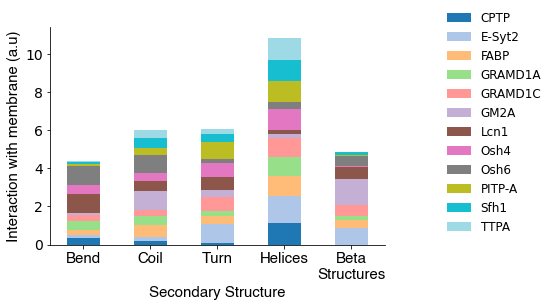

In [47]:
ax=df_merged[5:10].plot.bar(x='Sec_Structure',stacked=True, cmap='tab20')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
hfont = {'fontname':'Helvetica'}

ax.set_xlabel("Secondary Structure", size=15, **hfont)
ax.set_ylabel("Interaction with membrane (a.u)", size=15, **hfont)
mylabels=['CPTP','E-Syt2','FABP','GRAMD1A','GRAMD1C','GM2A','Lcn1','Osh4','Osh6','PITP-A','Sfh1','TTPA']
mylabels2=['Bend','Coil','Turn','Helices','Beta\nStructures']
ax.set_xticklabels(mylabels2, size=15, **hfont)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
ax.legend(labels=mylabels,bbox_to_anchor=(1.5, 0), loc='lower right',frameon=False,fontsize=12)
# ax.get_legend().remove()
plt.rcParams['font.size'] = 12
ax.tick_params(axis='y',labelsize=14)
# plt.tight_layout()
ax.figure.savefig('ss_bar_wprotein_legend.png',dpi=330)
plt.show()

In [48]:
df_merged[5:10]

,Sec_Structure,Longest_Duration_cptp,Longest_Duration_smp,Longest_Duration_fabp,Longest_Duration_astera,Longest_Duration_asterc,Longest_Duration_gm2a,Longest_Duration_lcn1,Longest_Duration_osh4,Longest_Duration_osh6,Longest_Duration_pitpa,Longest_Duration_sfh1,Longest_Duration_ttpa
5,Bend,0.326651,0.179710,0.260067,0.466568,0.297340,0.136459,1.000000,0.458128,1.000000,0.094960,0.115174,0.048351
6,Coil,0.164505,0.217391,0.664430,0.454681,0.336463,0.968393,0.528409,0.428571,0.931634,0.398101,0.497258,0.429867
7,Turn,0.095519,1.000000,0.402685,0.260030,0.751956,0.372988,0.642045,0.733990,0.227115,0.889701,0.438757,0.260388
8,Helices,1.130896,1.443478,1.005034,1.000000,1.000000,0.238512,0.204545,1.088670,0.354577,1.115413,1.078611,1.204986
9,Beta Structures,0.000000,0.881159,0.422819,0.190193,0.575117,1.380569,0.625000,0.049261,0.521437,0.062089,0.142596,0.016117


<ipython-input-85-227a70afb96c>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


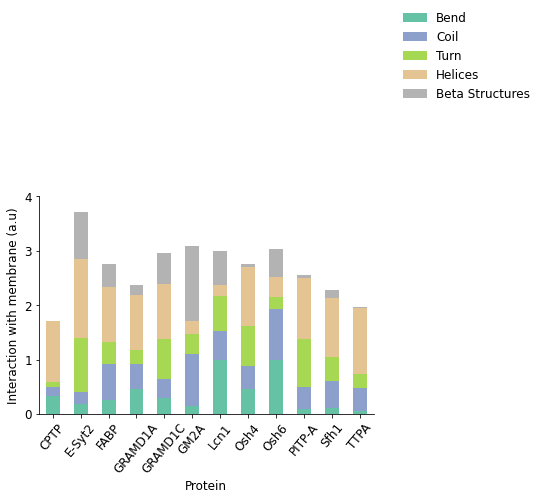

In [85]:
# dfT = df_merged[5:10].set_index('Sec_Structure').T
ax=dfT.plot.bar(stacked=True, cmap='Set2',legend=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Protein")
ax.set_ylabel("Interaction with membrane (a.u)")
mylabels=['CPTP','E-Syt2','FABP','GRAMD1A','GRAMD1C','GM2A','Lcn1','Osh4','Osh6','PITP-A','Sfh1','TTPA']
for tick in ax.get_xticklabels():
    tick.set_rotation(50)
ax.set_xticklabels(mylabels)
ax.legend(bbox_to_anchor=(1.5, 1.9), loc='upper right',frameon=False)
# ax.get_legend().remove()
plt.tight_layout()
y_ticks=[0,1,2,3,4]
plt.yticks(y_ticks)
ax.figure.savefig('ss_bar_eachprot_legend.png',dpi=330)

In [50]:
df_merged['mean'] = df_merged.mean(axis=1)
df_merged

<ipython-input-50-b0234ef24c7f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merged['mean'] = df_merged.mean(axis=1)


,Sec_Structure,Longest_Duration_cptp,Longest_Duration_smp,Longest_Duration_fabp,Longest_Duration_astera,Longest_Duration_asterc,Longest_Duration_gm2a,Longest_Duration_lcn1,Longest_Duration_osh4,Longest_Duration_osh6,Longest_Duration_pitpa,Longest_Duration_sfh1,Longest_Duration_ttpa,mean
0,3-helix,0.130896,0.533333,0.005034,0.000000,0.000000,0.000000,0.000000,0.088670,0.008111,0.115413,0.078611,0.204986,0.097088
1,5-helix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A-helix,1.000000,0.910145,1.000000,1.000000,1.000000,0.238512,0.204545,1.000000,0.346466,1.000000,1.000000,1.000000,0.808306
3,B-Bridge,0.000000,0.000000,0.000000,0.000000,0.003912,0.380569,0.000000,0.009852,0.002317,0.007305,0.032907,0.000000,0.036405
4,B-Sheet,0.000000,0.881159,0.422819,0.190193,0.571205,1.000000,0.625000,0.039409,0.519119,0.054785,0.109689,0.016117,0.369125
5,Bend,0.326651,0.179710,0.260067,0.466568,0.297340,0.136459,1.000000,0.458128,1.000000,0.094960,0.115174,0.048351,0.365284
6,Coil,0.164505,0.217391,0.664430,0.454681,0.336463,0.968393,0.528409,0.428571,0.931634,0.398101,0.497258,0.429867,0.501642
7,Turn,0.095519,1.000000,0.402685,0.260030,0.751956,0.372988,0.642045,0.733990,0.227115,0.889701,0.438757,0.260388,0.506264
8,Helices,1.130896,1.443478,1.005034,1.000000,1.000000,0.238512,0.204545,1.088670,0.354577,1.115413,1.078611,1.204986,0.905393
9,Beta Structures,0.000000,0.881159,0.422819,0.190193,0.575117,1.380569,0.625000,0.049261,0.521437,0.062089,0.142596,0.016117,0.405530


In [51]:
df_merged_mean=df_merged[['Sec_Structure', 'mean']]
df_merged_f=df_merged_mean[5:10]
df_merged_f

,Sec_Structure,mean
5,Bend,0.365284
6,Coil,0.501642
7,Turn,0.506264
8,Helices,0.905393
9,Beta Structures,0.405530


([<matplotlib.axis.YTick at 0x7f8c86775b50>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6')])

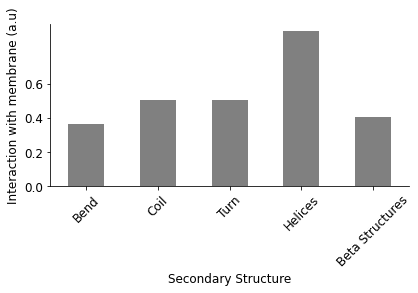

In [52]:
ax=df_merged_f.plot.bar(color='grey', legend=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Secondary Structure")
ax.set_ylabel("Interaction with membrane (a.u)")
my_labels=df_merged_f['Sec_Structure']

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_xticklabels(my_labels)
ax.get_legend().remove()
# ax.legend(bbox_to_anchor=(1.35, 1), loc='upper right',frameon=False)
plt.tight_layout()
y_ticks=[0,0.2,0.4,0.6]
plt.yticks(y_ticks)

Code reference for circular bar plots : https://python-graph-gallery.com/circular-barplot/ 

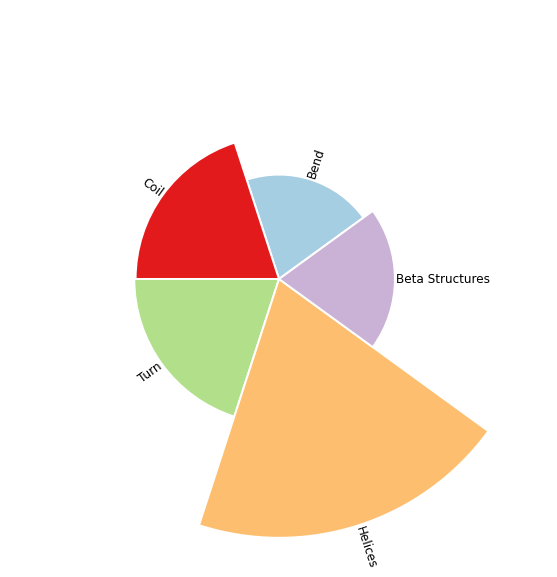

In [53]:

color1 = ["#a6cee3"] + ["#e31a1c"] + ["#b2df8a"] + ["#fdbf6f"] + ["#cab2d6"] + ["#d9c321"] + ["#202d7d"] + ["#992042"]

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_merged_f['mean'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_merged_f['mean'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_merged_f['mean'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_merged_f['mean'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.005

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_merged_f['Sec_Structure']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('ss_circular.png',dpi=330)